In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pca-dataset/global_heat_index.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/kaggle/input/pca-dataset/global_heat_index.csv")
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [4]:
clean1=df[df['Hour']<6]
clean2=df[df['Hour']>18]

print("Cleaning data from 12am to 5:59 am")

clean1.head()

Cleaning data from 12am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [5]:
print("Cleaning data from 6pm to 11:59 pm")

clean2.head()

Cleaning data from 6pm to 11:59 pm


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [6]:
df=df[~(df['Hour'] < 6) & ~(df['Hour'] > 18)]
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
...,...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763,553
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734,408
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131,221
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606,16


In [7]:
x=df.iloc[:,4:10].values
y=df.iloc[:,10].values

y=y.reshape(-1,1)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


Standardizing the data

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train)

K-Means with 6 clusters

In [9]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=6,random_state=0)
kmeans=kmeans.fit(x_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
labels=kmeans.labels_
print("labels: ",labels)
cluster_centers=kmeans.cluster_centers_
print("/n/n Cluster Centroids : ",cluster_centers)


labels:  [4 2 3 ... 5 4 4]
/n/n Cluster Centroids :  [[ 0.16514599 -0.37183722  0.64944113  0.20694672  0.67454948 -0.79919315]
 [ 0.4028263   1.05270045 -1.07625442 -0.40782607  0.51052584  1.49341357]
 [-0.62922428 -0.2382606   0.85747373 -0.5826973  -1.35137904 -0.68896787]
 [-1.06742046  0.68333301  0.04957812 -1.16310858  0.83404147  0.01356953]
 [ 1.18774524  0.07107491 -0.93458801  1.27392977  0.25329346 -0.09429523]
 [-0.63825654 -1.64715456  1.1805509   0.27677496 -1.09069466 -0.03323327]]


Applying PCA

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2).fit(x_train).transform(x_train)

In [13]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

In [14]:
x_train

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

Visualization

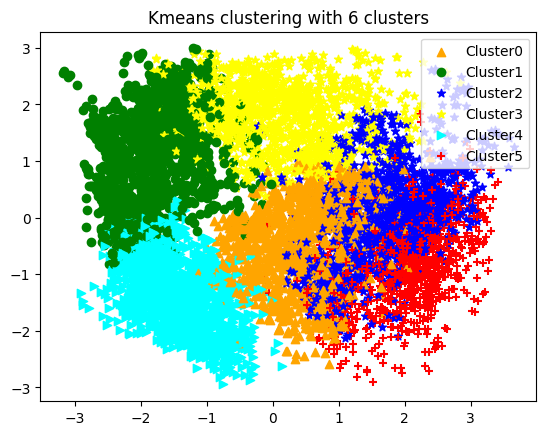

In [16]:
for i in range(0,pca.shape[0]):
    if kmeans.labels_[i]==0:
        cl_6=plt.scatter(pca[i][0],pca[i][1],c="orange",marker="^")
    elif kmeans.labels_[i]==1:
        c2_6=plt.scatter(pca[i][0],pca[i][1],c="g",marker="o")
    elif kmeans.labels_[i]==2:
        c3_6=plt.scatter(pca[i][0],pca[i][1],c="b",marker="*")
    elif kmeans.labels_[i]==3:
        c4_6=plt.scatter(pca[i][0],pca[i][1],c="yellow",marker="*")
    elif kmeans.labels_[i]==4:
        c5_6=plt.scatter(pca[i][0],pca[i][1],c="cyan",marker=">")
    elif kmeans.labels_[i]==5:
        c6_6=plt.scatter(pca[i][0],pca[i][1],c="red",marker="+")
        
plt.rcParams['figure.figsize']=(12,10)

plt.legend([cl_6,c2_6,c3_6,c4_6,c5_6,c6_6],['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'])
plt.title("Kmeans clustering with 6 clusters")
plt.show()